

### 🧨 **Business Problem:**

#### 🏢 **Company**: SafeNet Web Security Solutions

#### 📌 **Context**:
SafeNet is a cybersecurity firm that provides a **web safety plugin** to browsers and corporate firewalls. Their goal is to **identify and block phishing websites** before users can click on them.

Currently, their detection relies on:
- Manually curated blacklists (too slow to update)
- Simple pattern-matching rules (easily bypassed by smart attackers)

To improve their system, they want to develop a **machine learning-based phishing detection engine** that can:

1. Analyze characteristics of a URL (e.g., IP presence, '@' symbol, domain length, SSL status, etc.)
2. Classify it in real-time as **phishing or legitimate**
3. Integrate this engine into browsers, firewalls, or even email clients to pre-warn users

---

### 🎯 **Business Objective**

> **Automatically detect phishing websites** based on their structural and technical attributes using a predictive machine learning model, with **>95% accuracy** and **low false positives** to minimize disruption for legitimate sites.

---

### 💼 **Business Impact**

- Reduce user exposure to phishing attacks
- Decrease helpdesk ticket volumes due to malware/ransomware
- Improve customer trust and brand value
- Potential monetization via API for other security platforms

---

### 🧪 **ML Problem Statement**

> Given a dataset of websites and their technical attributes, build a binary classification model that predicts whether a website is **phishing (`-1`)** or **legitimate (`1`)**.

---

### 🧾 **Success Metrics**

- Accuracy / F1 Score
- Low False Negatives (minimize missed phishing sites)
- Inference time (real-time readiness)

---


# data understanding

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv("/content/phising.csv")
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [ ]:
df.shape

(11055, 31)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5849 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            5849 non-null   int64
 1   URL_Length                   5849 non-null   int64
 2   Shortining_Service           5849 non-null   int64
 3   having_At_Symbol             5849 non-null   int64
 4   double_slash_redirecting     5849 non-null   int64
 5   Prefix_Suffix                5849 non-null   int64
 6   having_Sub_Domain            5849 non-null   int64
 7   SSLfinal_State               5849 non-null   int64
 8   Domain_registeration_length  5849 non-null   int64
 9   Favicon                      5849 non-null   int64
 10  port                         5849 non-null   int64
 11  HTTPS_token                  5849 non-null   int64
 12  Request_URL                  5849 non-null   int64
 13  URL_of_Anchor                5849 non-null   int64
 

In [ ]:
df.skew().sort_values()

,0
RightClick,-4.176163
Iframe,-2.540064
on_mouseover,-2.093796
Shortining_Service,-2.077299
double_slash_redirecting,-2.065059
Statistical_report,-1.944747
Abnormal_URL,-1.846403
port,-1.842960
Google_Index,-1.766112
HTTPS_token,-1.727698


In [ ]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,...,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000
mean,0.132843,-0.616003,0.720294,0.588648,0.718242,-0.760301,0.065823,0.149085,-0.305864,0.581809,...,0.564028,0.785604,0.021371,0.475124,0.233886,-0.423833,0.661823,0.347752,0.697042,-0.032313
std,0.991222,0.777323,0.693728,0.808459,0.695852,0.649627,0.802448,0.924473,0.952157,0.813395,...,0.825826,0.618782,0.999857,0.879994,0.826010,0.905818,0.749725,0.579027,0.717091,0.999563
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# do feature selection and check for balancing is required ?

In [ ]:
df.Result.value_counts()

,count
Result,
-1,3019
1,2830


<Axes: >

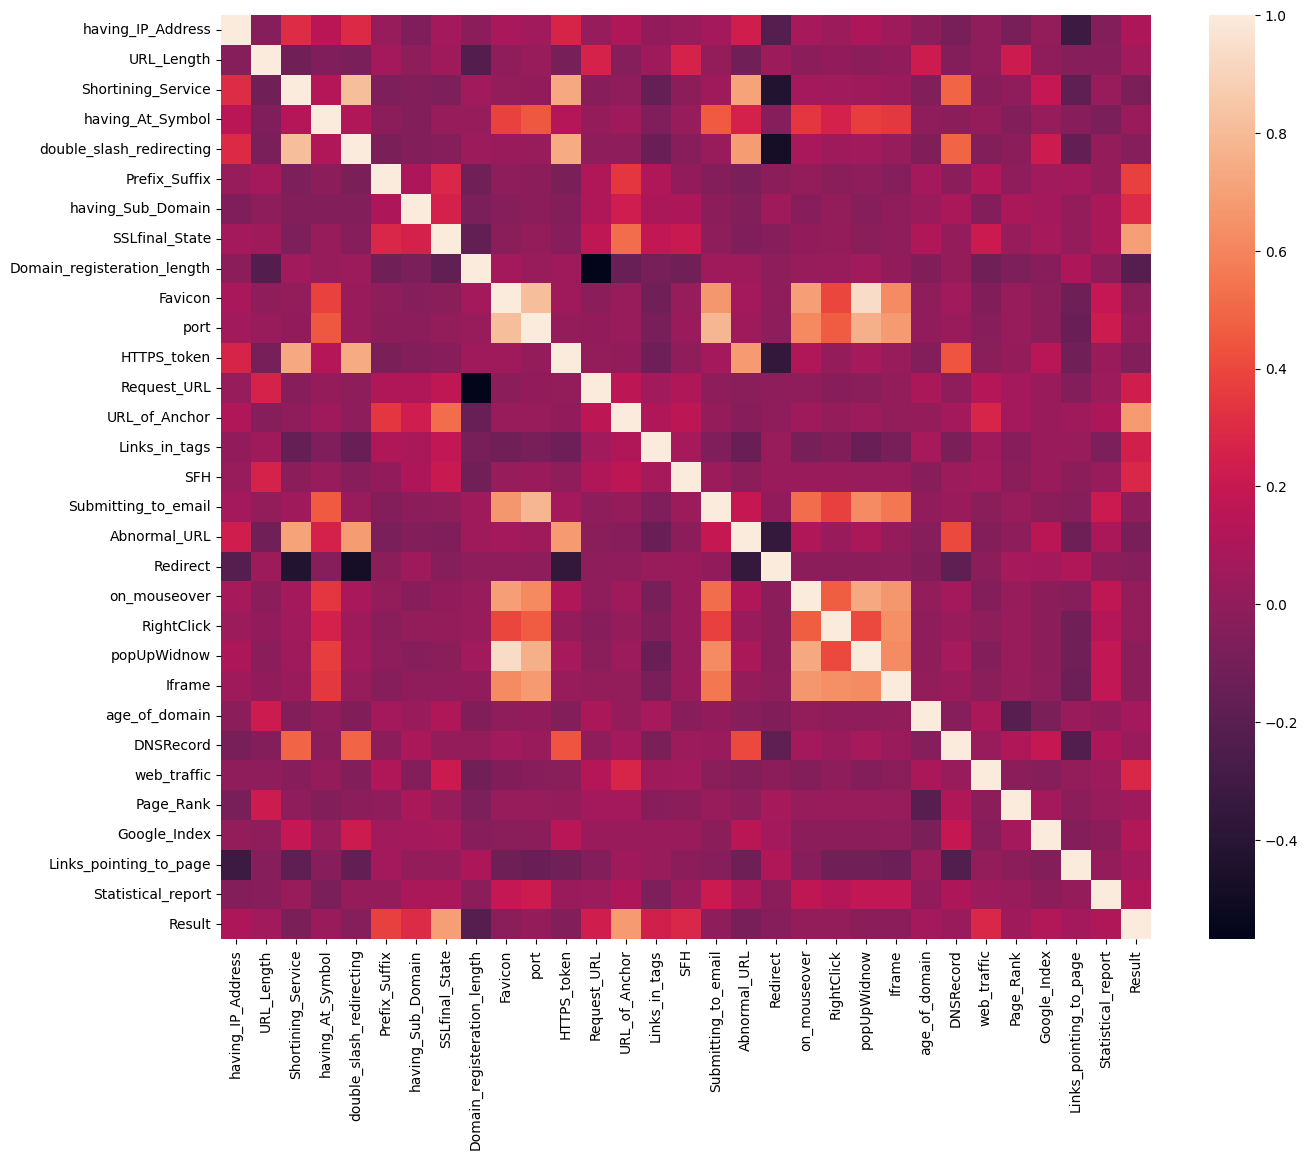

In [ ]:
plt.figure(figsize=(15,12))

sns.heatmap(df.corr())

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.8)
x = pca.fit_transform(df)

pca.explained_variance_ratio_

array([0.15340199, 0.1296001 , 0.10637257, 0.06918979, 0.0621973 ,
       0.0534685 , 0.04023787, 0.03607604, 0.03286107, 0.031343  ,
       0.02860571, 0.02628748, 0.024858  , 0.02400017])

In [ ]:
x = df.drop('Result', axis=1)
y = df['Result']

In [ ]:
pca = PCA(.8)
x_pca = pca.fit_transform(x)


In [ ]:
x_pca

array([[-1.16230419, -2.4139271 , -1.46686204, ..., -0.587757  ,
        -0.13532   , -0.96168791],
       [ 0.68518045, -1.2615284 ,  0.6642835 , ..., -1.27417177,
         0.69819313,  0.33011398],
       [-0.47290237, -1.3721577 , -0.20914667, ..., -1.5359536 ,
        -1.70890637, -0.1578082 ],
       ...,
       [ 1.40688029,  0.90023539, -0.63841933, ..., -0.43022044,
         0.47985334, -0.27499949],
       [ 0.6019036 , -0.68844913, -2.31862881, ..., -0.14642861,
        -1.09553216,  1.22127629],
       [ 0.9716999 ,  1.03750047, -2.79639099, ...,  0.94342952,
        -0.05805745, -2.04132058]])

In [ ]:
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

In [ ]:
logistic regression - random - xgboost - svm


80 70 90 95

SyntaxError: invalid syntax (<ipython-input-18-20a6d10af6c8>, line 1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
x_pred = model.predict(x_train)
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, x_pred))


0.9034188034188034
0.9046804872836076


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
x_pred = model.predict(x_train)
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, x_pred))

0.9196581196581196
0.9910237230177388


In [ ]:
y_train = y_train.replace(-1,0)
y_test = y_test.replace(-1,0)

In [ ]:
x_train[0]

array([-3.95449987,  2.21494325, -1.35123753, -0.508438  ,  0.44857692,
        1.98491103,  0.00578477, -0.10706355, -1.29231566,  0.58529955,
       -1.58990614,  0.65788223, -0.00548988, -0.45461347])

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
x_pred = model.predict(x_train)
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, x_pred))

0.9196581196581196
0.9910237230177388


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       620
           1       0.92      0.91      0.91       550

    accuracy                           0.92      1170
   macro avg       0.92      0.92      0.92      1170
weighted avg       0.92      0.92      0.92      1170



In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
x_pred = model.predict(x_train)
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, x_pred))

0.9264957264957265
0.9337465270356914


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       620
           1       0.93      0.92      0.92       550

    accuracy                           0.93      1170
   macro avg       0.93      0.93      0.93      1170
weighted avg       0.93      0.93      0.93      1170



perform hyper parameter tuning

In [ ]:
import pickle
with open('model.pkl', 'wb') as file:
  pickle.dump(model, file)

In [ ]:
y_test

,Result
1777,0
856,0
1385,0
23,1
8446,0
...,...
5254,0
7218,0
6617,1
10105,0
